In [11]:
import pandas as pd
import scanpy as sc
import numpy as np


adata = (sc.read_csv("BBC_CD8_post_yes.csv", delimiter =","))
meta = pd.read_csv("BBC_meta.csv", delimiter =",", index_col=0)
adata = adata.transpose()
adata.obs = meta

In [ ]:
adata.layers["counts"] = adata.X.copy()

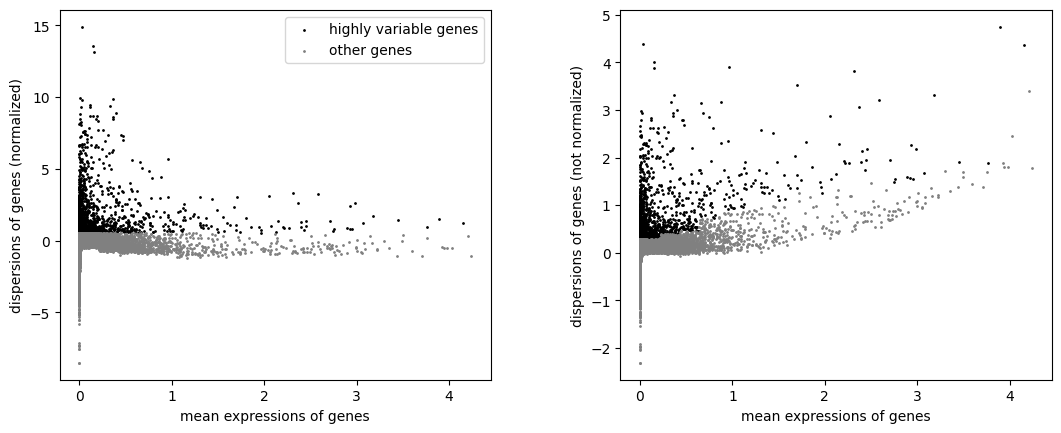

In [4]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)
sc.tl.pca(adata)

In [6]:
adata2 = adata
sc.external.pp.harmony_integrate(adata2, "orig.ident", basis='X_pca', adjusted_basis='X_pca_harmony')

2024-08-08 00:05:16,145 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-08-08 00:05:19,047 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-08-08 00:05:19,077 - harmonypy - INFO - Iteration 1 of 10
2024-08-08 00:05:20,477 - harmonypy - INFO - Iteration 2 of 10
2024-08-08 00:05:22,096 - harmonypy - INFO - Converged after 2 iterations


In [7]:
adata2.obsm['X_pca'] = adata2.obsm['X_pca_harmony']
sc.pp.neighbors(adata2, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata2)
sc.tl.leiden(adata2, resolution=0.9)

2024-08-08 00:05:27.376663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 00:05:28.271351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_1164541/3443213312.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata2, resolution=0.9)


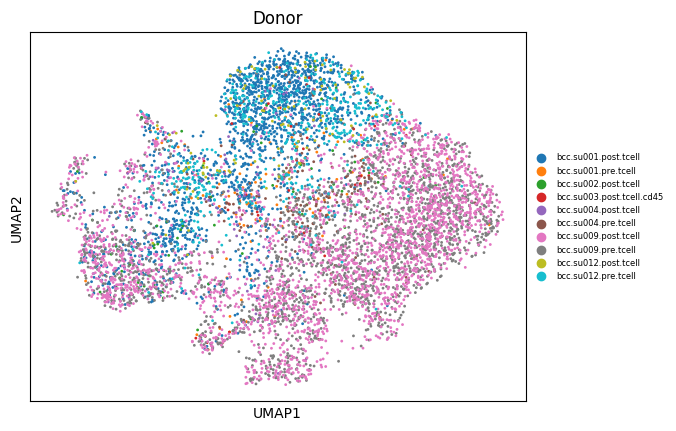

In [8]:
# by sample
donor_umap = sc.pl.umap(adata, color=['orig.ident'],
    show=False, 
legend_fontsize=6, frameon=True, title='Donor')

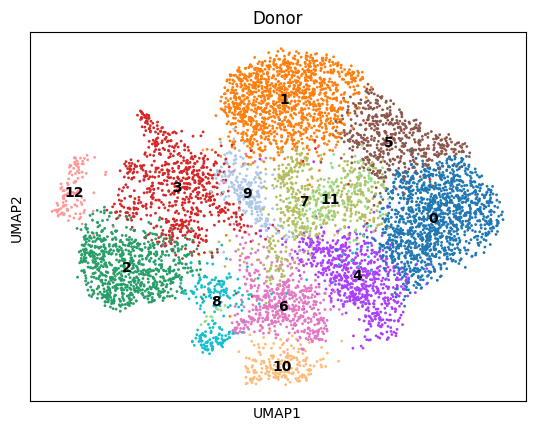

In [14]:
donor_umap = sc.pl.umap(adata2, color=['leiden'],
    
                        legend_loc = "on data", frameon=True, title='Donor')

In [9]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata2, groupby="leiden", method="wilcoxon")

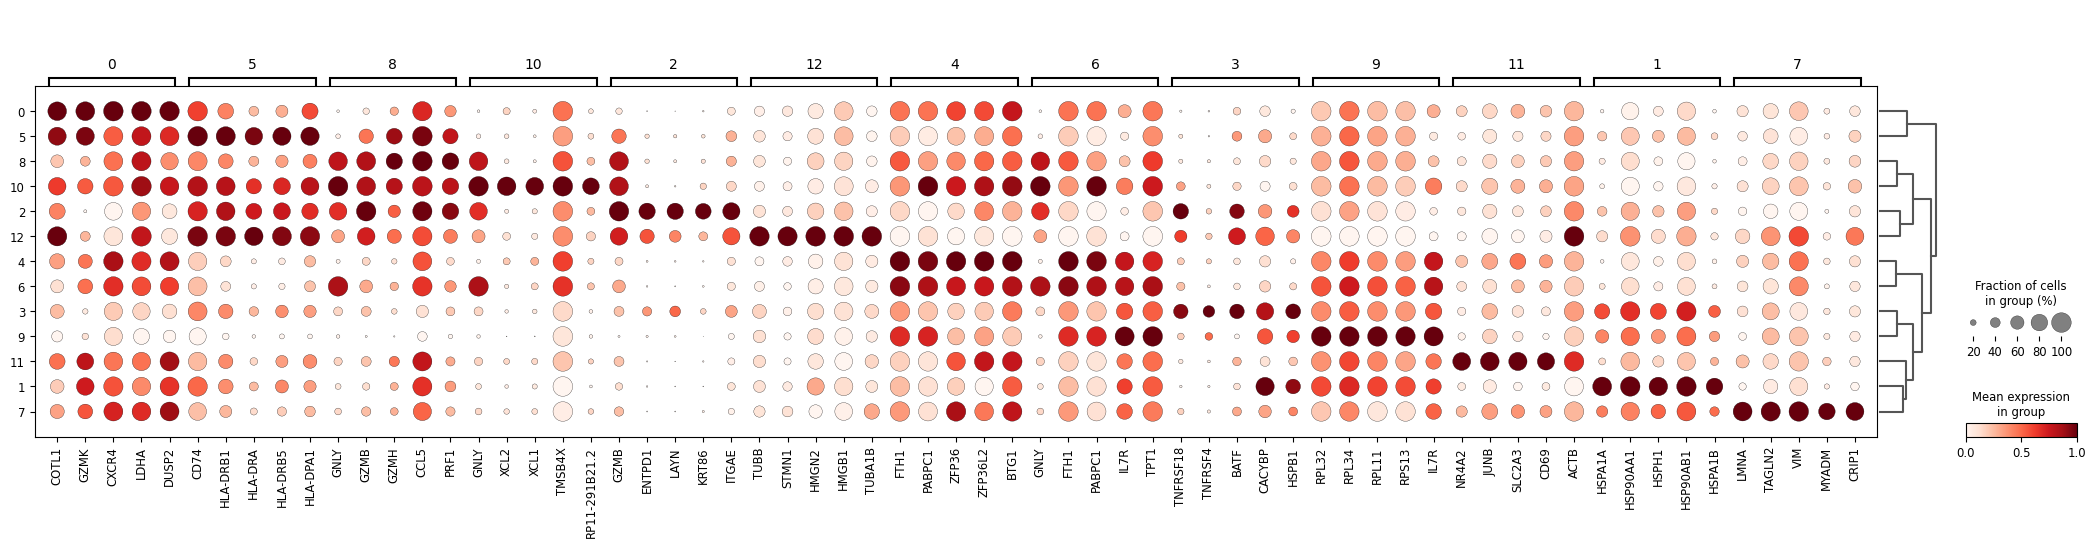

In [10]:
sc.pl.rank_genes_groups_dotplot(
    adata2, groupby="leiden", standard_scale="var", n_genes=5
)